<a href="https://colab.research.google.com/github/vinayvst012/Hotel_Booking---Vinayak-Tigadi/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#Importing libraries for future analysis of the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive

In [2]:
#mounting the drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#path of the hotel_booking csv file present in google drive
data_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_Projects/EDA_Capstone_Project/datasets/Hotel Bookings.csv'

In [4]:
#Creating dataset from a csv file by passing the path of csv file and displaying top 5 values
df = pd.read_csv(data_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Checking number of rows and columns present in dataset

print(f'number of rows : {df.shape[0]} and number of columns {df.shape[1]}')

number of rows : 119390 and number of columns 32


In [6]:
#Checking dataset of every columns in dataset

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
#Information about the dataset such as column name, null and non-null values , data types of each columns and memory usage for better understanding of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Handling null values for better analysis of dataset 

In [8]:
#by above information I observe that company column has very large number of null values and has no use for analysis , So its better to drop the column

df.drop(['company'],axis=1,inplace=True)

In [9]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df[df['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,0,No Deposit,NaN,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,0,No Deposit,NaN,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,0,No Deposit,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,0,No Deposit,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,0,No Deposit,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [11]:
#Agent column has NaN value ,Replacing it with 0 - agent values with real data has positive values,thus 0 is considered to be absence of a value
df['agent'] = df['agent'].fillna(0)

In [12]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [13]:
#Replacing values as NaN in Country column with 'Not Availale'

df['country'].replace(np.NaN,'Not Availabe',inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [14]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,0,No Deposit,0.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,0,No Deposit,14.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,0,No Deposit,0.0,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,0,No Deposit,9.0,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [15]:
#Replacing values of children to 0

df['children'].replace(np.NaN,0,inplace=True)

# Creating categorical columns for better memory usage and performance

In [16]:
#Creating categorical columns
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [17]:

df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [18]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [19]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [20]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [21]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [22]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [23]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [24]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [26]:
df['hotel'] = df['hotel'].astype('category')
df['meal'] = df['meal'].astype('category')
df['market_segment'] = df['market_segment'].astype('category')
df['distribution_channel'] = df['distribution_channel'].astype('category')
df['deposit_type'] = df['deposit_type'].astype('category')
df['customer_type'] =  df['customer_type'].astype('category')
df['reservation_status'] = df['reservation_status'].astype('category')
df['reserved_room_type'] = df['reserved_room_type'].astype('category')
df['assigned_room_type'] = df['assigned_room_type'].astype('category')


In [27]:
#Size of the memory usage reduced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  object  
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119390 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

### Comparing the number of non-cancelled reservations of all the hotels , So that we can observe the popularity of each hotel

In [52]:
df[df['is_canceled']==0].groupby(by=['hotel'])['is_canceled'].count()

hotel
City Hotel      46228
Resort Hotel    28938
Name: is_canceled, dtype: int64

### We can observe that city Hotel has served much more customers then Resort Hotel

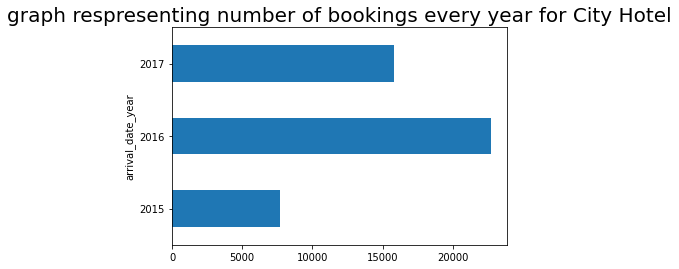

In [74]:
plt.title('graph respresenting number of bookings every year for City Hotel',fontsize=20)
df[df['is_canceled']==0].groupby(by=['hotel'])['arrival_date_year'].value_counts().sort_index()['City Hotel'].plot(kind='barh')


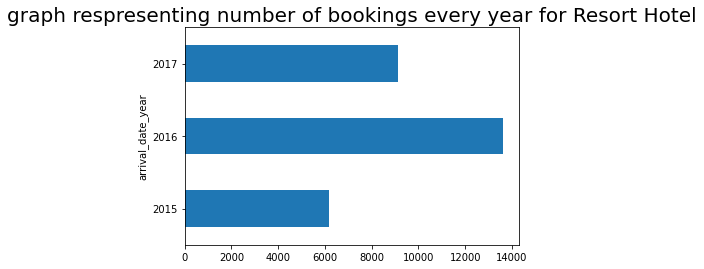

In [76]:
plt.title('graph respresenting number of bookings every year for Resort Hotel',fontsize=20)
df[df['is_canceled']==0].groupby(by=['hotel'])['arrival_date_year'].value_counts().sort_index()['Resort Hotel'].plot(kind='barh')

we can observe from above graph that both hotels had a spike in number of reservations in the year 2016

## Comparing people staying in hotel for weekend night and week night in each hotel

In [78]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

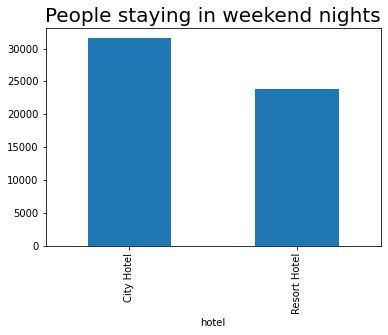

In [87]:
plt.title('People staying in weekend nights',fontsize=20)
(df.groupby(by=['hotel'])['stays_in_weekend_nights'].sum()//2).plot(kind='bar')

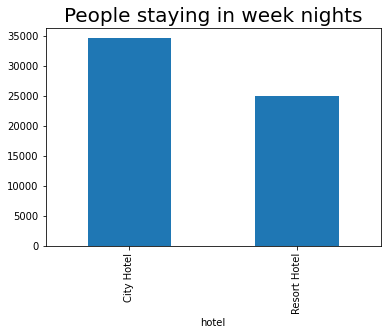

In [88]:
plt.title('People staying in week nights',fontsize=20)
(df.groupby(by=['hotel'])['stays_in_week_nights'].sum()//5).plot(kind='bar')

In [92]:
df.groupby(by=['hotel'])['babies'].sum()

hotel
City Hotel      392
Resort Hotel    557
Name: babies, dtype: int64